**Importing Libraries & Packages**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

**print first 10 rows of the dataset**

In [64]:
df = pd.read_csv('phones_data.csv',encoding='latin-1')
df.head(5)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


**print last 5 rows of the dataset**

In [65]:
df = pd.read_csv('phones_data.csv',encoding='latin-1')
df.tail(5)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1219,1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018
1220,1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018
1221,1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019
1222,1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.0,18500.0,19010.0,2,6.65,128.0,4500.0,10-2020
1223,1223,Sigma mobile,x-style 35 Screen,NaN,952,907.0,785.0,944.0,75,3.50,NaN,1750.0,1-2020


**Check Datatypes of each column**


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


**Check Null values in datasets**

In [67]:
df.isnull().sum()

,0
Unnamed: 0,0
brand_name,0
model_name,0
os,197
popularity,0
best_price,0
lowest_price,260
highest_price,260
sellers_amount,0
screen_size,2


**Brand name with total count**

In [68]:
df['brand_name'].groupby(df['brand_name']).count().sort_values(ascending=False)


,brand_name
brand_name,
Samsung,168
Xiaomi,111
Apple,102
Motorola,62
Sigma mobile,52
...,...
Microsoft,1
Land,1
myPhone,1


**Remove irrelevant brands**

In [69]:
df = df.query("brand_name not in ['myPhone', 'MAFAM', 'Land']")


In [70]:
df = df[df['brand_name'].isin(df['brand_name'].value_counts()[df['brand_name'].value_counts() > 16].index)]


In [71]:
df = df.query("brand_name not in ['myPhone', 'MAFAM', 'Land','ERGO','Tecno','Oukitel','ZTE','Nomi','Meizu','Ulefone']")

In [72]:
df['brand_name'].groupby(df['brand_name']).count().sort_values(ascending=False)

,brand_name
brand_name,
Samsung,168
Xiaomi,111
Apple,102
Motorola,62
Sigma mobile,52
HUAWEI,49
Nokia,48
DOOGEE,44
Blackview,42


**Check total Null values**

In [73]:
df.isnull().sum()

,0
Unnamed: 0,0
brand_name,0
model_name,0
os,62
popularity,0
best_price,0
lowest_price,178
highest_price,178
sellers_amount,0
screen_size,2


**Find Exact missing value row**

In [74]:
rows_missing=df[df.isnull().any(axis=1)]
rows_missing

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.000,3000.0,4-2020
6,6,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.000,3400.0,12-2018
12,12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
13,13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,Apple,iPhone 8 64GB Space Gray (MQ6G2),iOS,1162,11745.0,7343.0,15060.0,48,4.70,64.000,NaN,9-2017
1191,1191,Apple,iPhone 8 Plus 128GB Gold (MX262),iOS,741,18509.0,14000.0,22690.0,30,5.50,128.000,NaN,10-2019
1192,1192,Apple,iPhone 8 Plus 256GB Space Gray (MQ8G2),iOS,911,19043.0,12729.0,23928.0,40,5.50,256.000,NaN,9-2017
1193,1193,Apple,iPhone 8 Plus 64GB Space Gray (MQ8L2),iOS,1108,15605.0,10064.0,20550.0,46,5.50,64.000,NaN,9-2017


**Handling missing value using sklearn**

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
df['os'] = le.fit_transform(df['os'])
df['brand_name'] = le.fit_transform(df['brand_name'])
df['model_name'] = le.fit_transform(df['model_name'])

In [78]:
df.rename(columns={'popularity':'output'}, inplace=True)
df.head()

,Unnamed: 0,brand_name,model_name,os,output,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
4,4,8,0,0,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,5,5,1,0,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018
6,6,5,2,0,424,3999.0,NaN,NaN,2,6.21,32.0,3400.0,12-2018
7,7,5,3,0,134,4973.0,4733.0,5295.0,6,6.21,64.0,3400.0,1-2019
8,8,5,4,0,477,5100.0,4990.0,5222.0,3,6.21,128.0,3400.0,1-2021


In [79]:
df['output'] = df['output'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,Unnamed: 0,brand_name,model_name,os,output,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
4,4,8,0,0,1,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,5,5,1,0,1,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018
6,6,5,2,0,1,3999.0,NaN,NaN,2,6.21,32.0,3400.0,12-2018
7,7,5,3,0,1,4973.0,4733.0,5295.0,6,6.21,64.0,3400.0,1-2019
8,8,5,4,0,1,5100.0,4990.0,5222.0,3,6.21,128.0,3400.0,1-2021


In [80]:
df['lowest_price'] = df['lowest_price'].fillna(df['lowest_price'].mean())
df['highest_price'] = df['highest_price'].fillna(df['highest_price'].mean())
df['memory_size'] = df['memory_size'].fillna(df['memory_size'].mean())
df['screen_size'] = df['screen_size'].fillna(df['screen_size'].mean())
df['battery_size'] = df['battery_size'].fillna(df['battery_size'].mean())

In [81]:
df

,Unnamed: 0,brand_name,model_name,os,output,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
4,4,8,0,0,1,1999.0,9545.224012,12343.471449,10,5.71,16.00000,3000.0,4-2020
5,5,5,1,0,1,10865.0,10631.000000,11099.000000,2,5.80,64.00000,3400.0,6-2018
6,6,5,2,0,1,3999.0,9545.224012,12343.471449,2,6.21,32.00000,3400.0,12-2018
7,7,5,3,0,1,4973.0,4733.000000,5295.000000,6,6.21,64.00000,3400.0,1-2019
8,8,5,4,0,1,5100.0,4990.000000,5222.000000,3,6.21,128.00000,3400.0,1-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1218,0,759,5,1,27190.0,21150.000000,30200.000000,47,6.50,512.00000,3174.0,9-2018
1219,1219,0,760,5,1,22685.0,16018.000000,27900.000000,61,6.50,64.00000,3174.0,9-2018
1220,1220,0,761,5,1,24600.0,21939.000000,33720.000000,28,6.50,64.00000,3174.0,9-2018
1221,1221,4,762,0,1,8804.0,7999.000000,9999.000000,18,6.26,128.00000,3750.0,11-2019


In [82]:
print(df.isnull().sum())

Unnamed: 0        0
brand_name        0
model_name        0
os                0
output            0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64


**memory size with brand count**

In [83]:
df['brand_name'].groupby(df['memory_size']).count().sort_values(ascending=False)

,brand_name
memory_size,
128.00000,250
64.00000,223
32.00000,136
256.00000,79
16.00000,68
111.58998,42
512.00000,32
0.00400,6
4.00000,6


**Distribution of data according to the popularity of mobile brands**

In [84]:
sns.set_style("white")

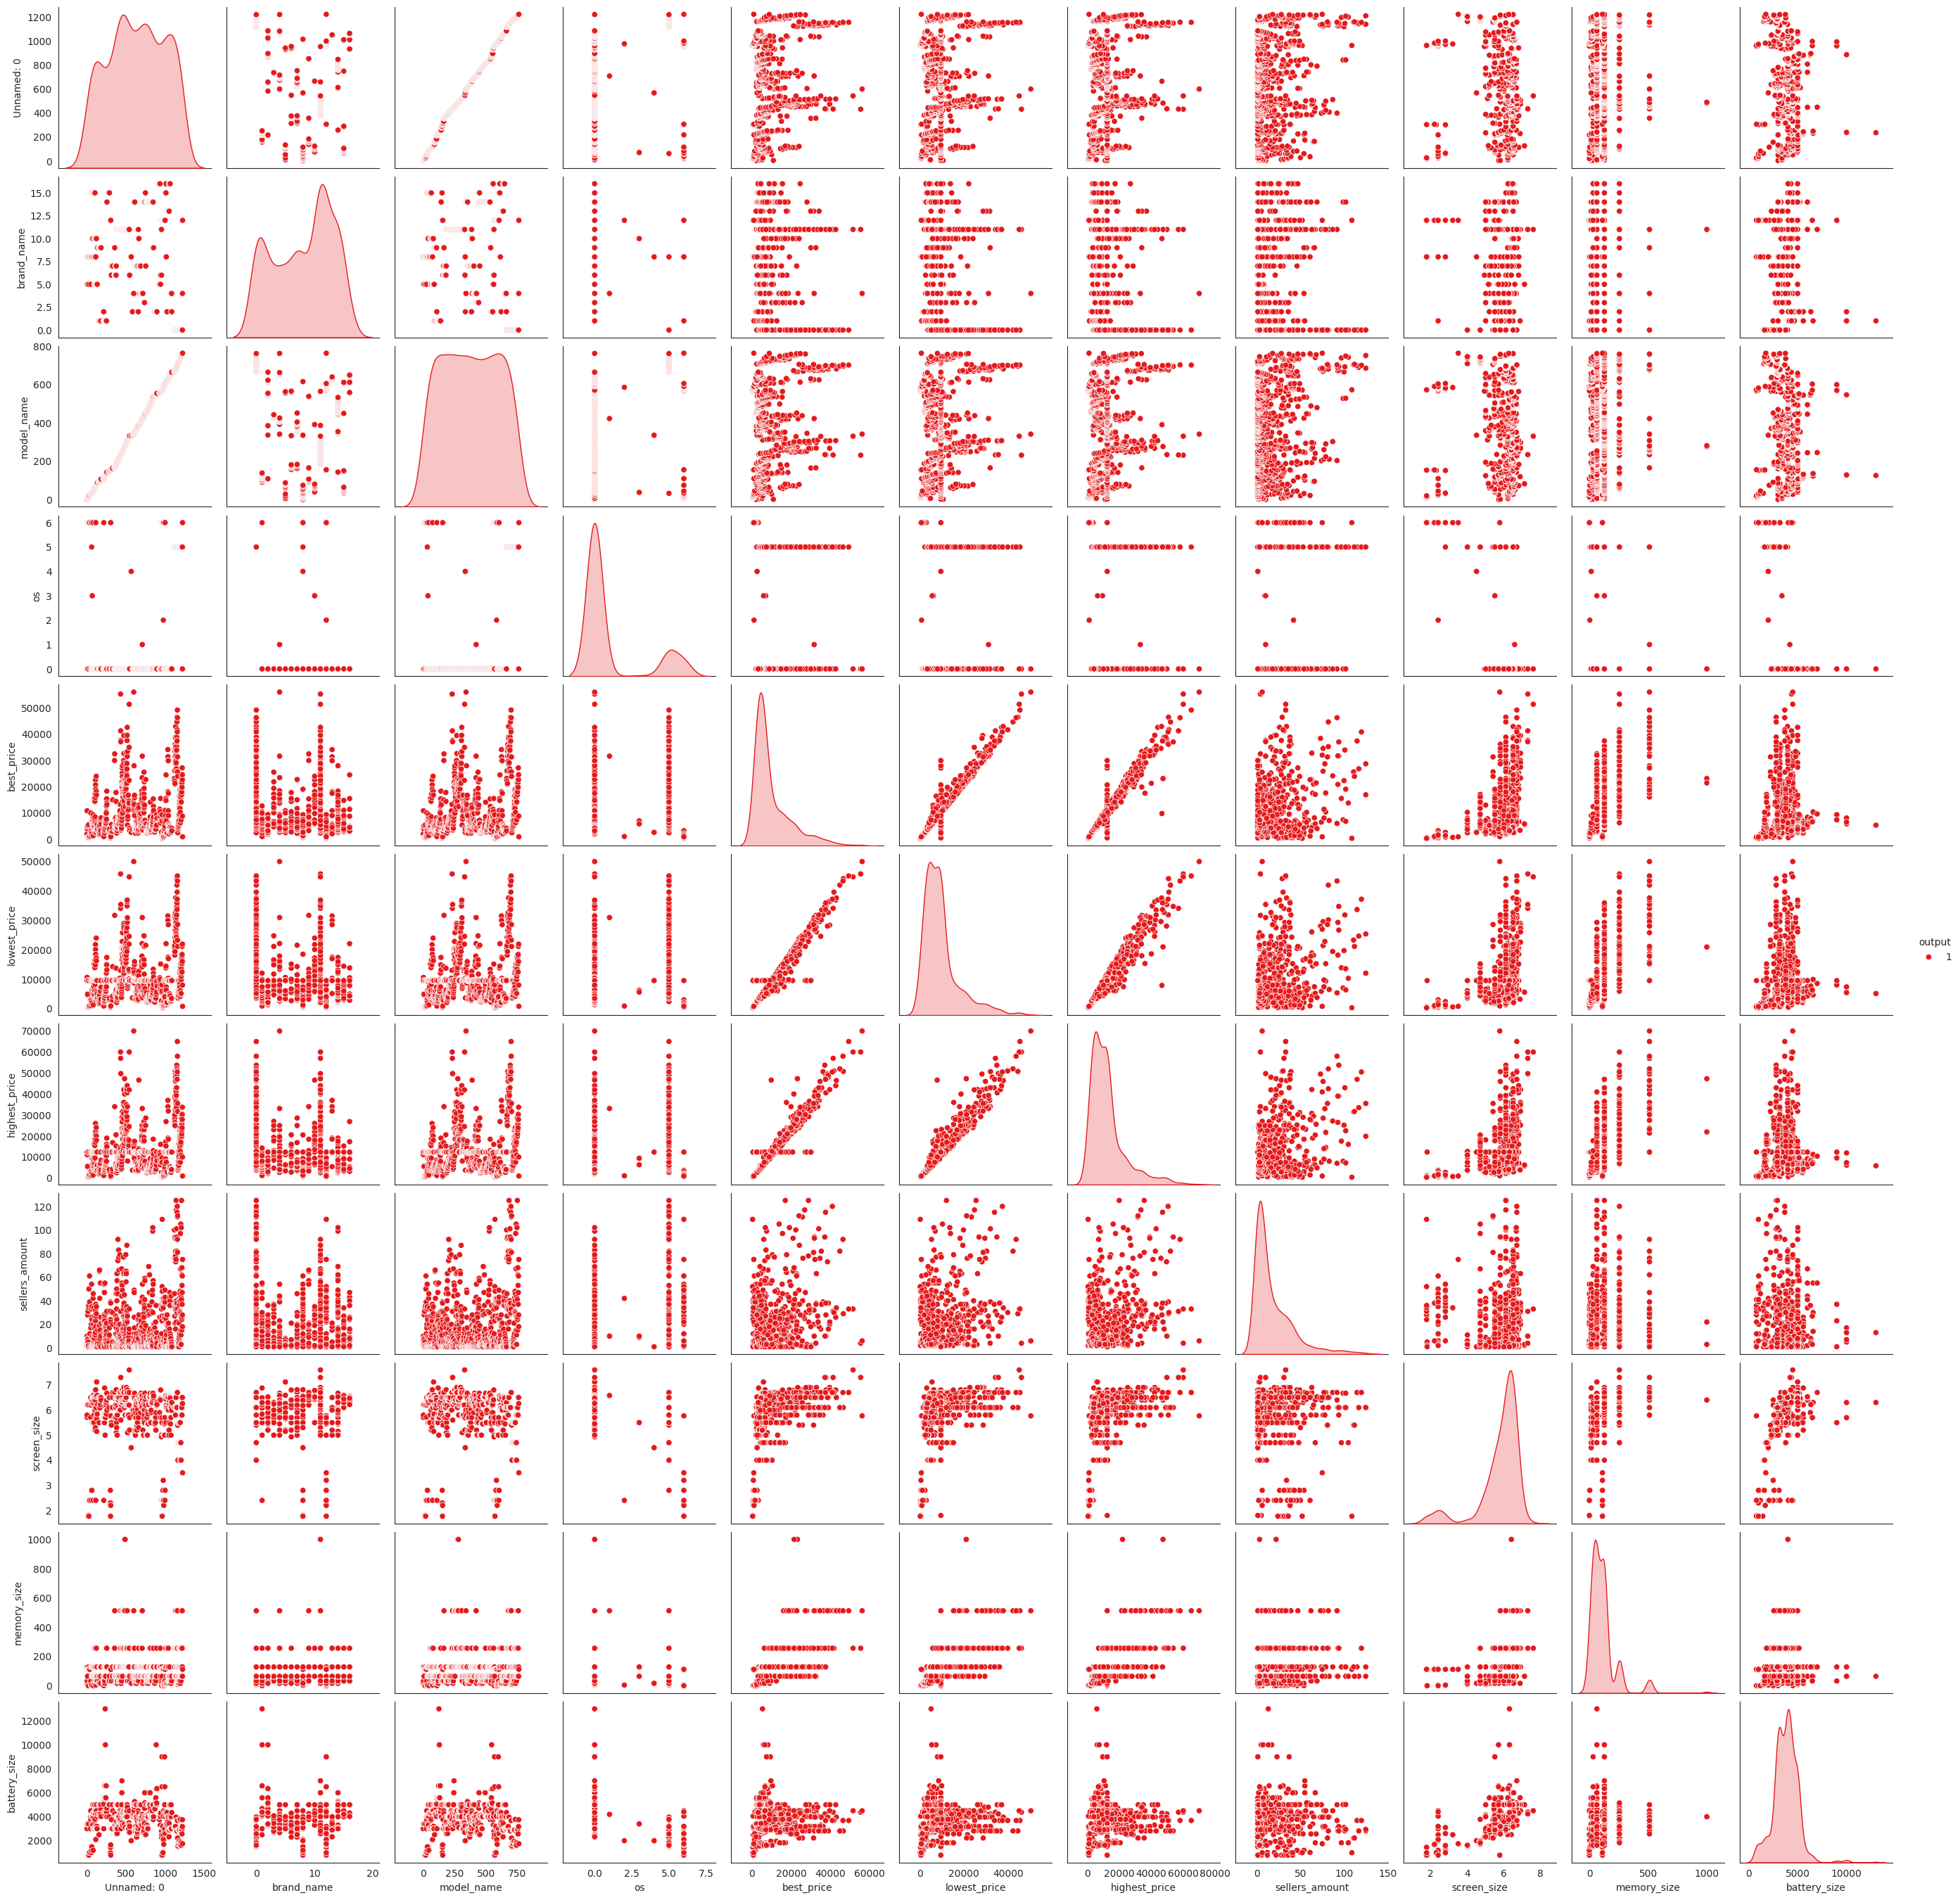

In [85]:
sns.pairplot(df, hue='output',palette='Set1')


**Distribution of data according to the different price of mobile brands**

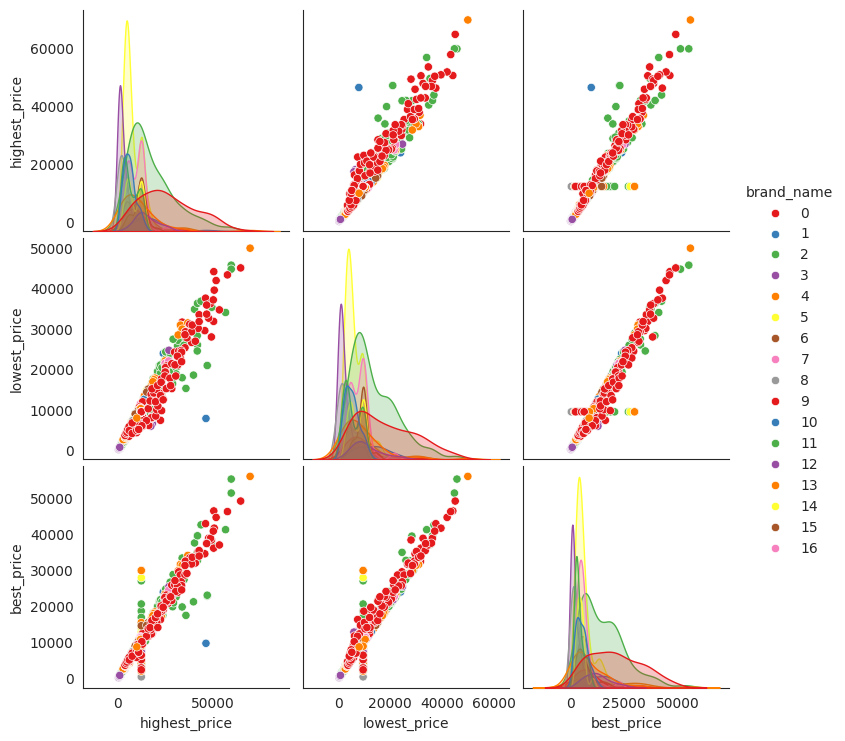

In [86]:
sns.pairplot(df[['highest_price', 'lowest_price', 'best_price', 'brand_name']], hue='brand_name', palette='Set1')

# Display the plot
plt.show()


In [87]:
df.keys()

Index(['Unnamed: 0', 'brand_name', 'model_name', 'os', 'output', 'best_price',
       'lowest_price', 'highest_price', 'sellers_amount', 'screen_size',
       'memory_size', 'battery_size', 'release_date'],
      dtype='object')

**best price of mobile brands**

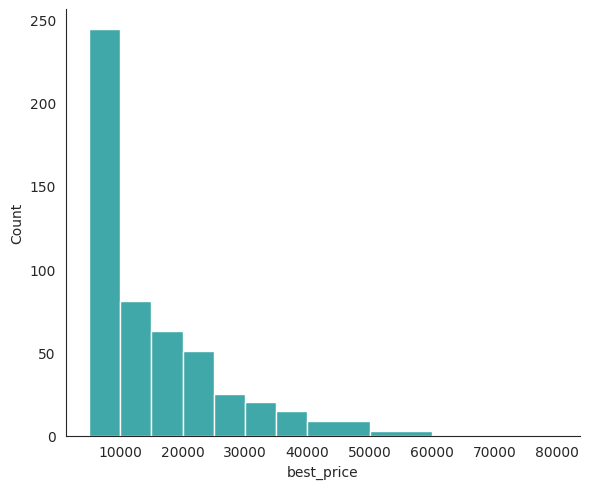

In [88]:
sns.displot(df, x= 'best_price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#008B8B')

**brandwise mobile phone price segments**

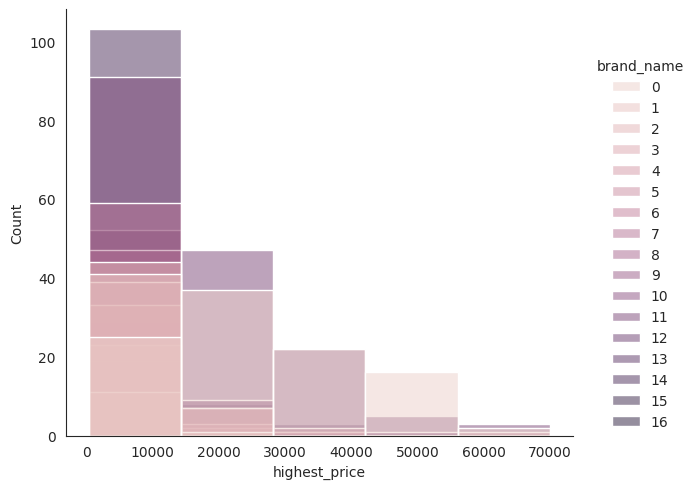

In [89]:

sns.displot(df, x='highest_price',bins=5, hue='brand_name',aspect=1.2)

**represents the brand name according to count**

<ipython-input-90-4e0a6e82675b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="brand_name", data=df, palette='Set2')


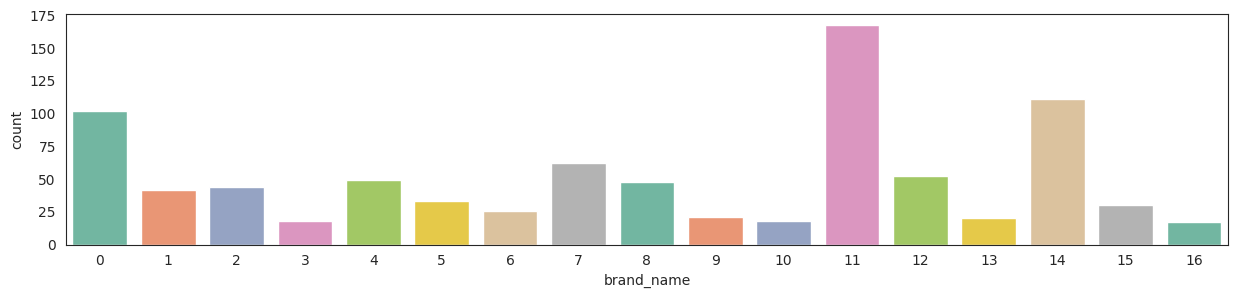

In [90]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="brand_name", data=df, palette='Set2')

**represents the memory size according to count**

<ipython-input-91-244ac75b0fe7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="memory_size", data=df,palette='Set3')


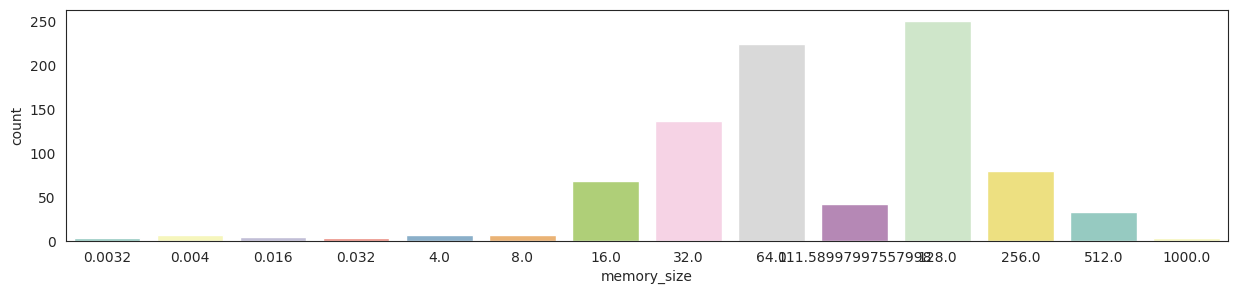

In [91]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="memory_size", data=df,palette='Set3')


**Brandwise Mean best prices**

In [92]:
round(df.groupby('brand_name')['best_price'].mean(),0).sort_values(ascending=False)

,best_price
brand_name,
0,21049.0
11,15180.0
13,14326.0
10,13382.0
3,12478.0
9,9530.0
4,9435.0
16,7839.0
15,6518.0
